# Statistics Mini Assessment Part 1

## Exercise 1

1. Load a dataset of your choosing from those found in Canvas. It can be the same one we are working with.
2. Inspect it and write down at least 5 issues you identified in this step.
3. Proceed to cleaning and preparing it for analysis.

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/thushara-lakshmanan/python-intro/master/data/fire_australia.csv', parse_dates=['acq_date'])
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [ ]:
df.isna().sum()

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,36011.0,-19.100962,7.265777e+00,-42.7628,-26.37025,-15.7065,-13.3436,-10.0726
longitude,36011.0,138.931446,9.261400e+00,114.1043,131.07225,136.7385,147.4775,153.4904
brightness,36011.0,328.750696,1.899281e+01,300.0000,316.50000,326.4000,336.7000,504.4000
scan,36011.0,1.620905,8.137639e-01,1.0000,1.10000,1.3000,1.9000,4.8000
track,36011.0,1.215281,2.478522e-01,1.0000,1.00000,1.1000,1.3000,2.0000
acq_time,36011.0,600.025798,5.483691e+02,0.0000,205.00000,424.0000,600.0000,2359.0000
confidence,36011.0,67.551387,2.317995e+01,0.0000,52.00000,70.0000,86.0000,100.0000
version,36011.0,6.300000,3.728625e-12,6.3000,6.30000,6.3000,6.3000,6.3000
bright_t31,36011.0,301.339138,9.724462e+00,267.0000,293.60000,302.4000,308.6000,400.1000
frp,36011.0,51.132176,9.228011e+01,0.0000,13.80000,25.8000,52.8000,3679.5000


In [63]:
#Data preparation
#Delete unwanted columns
df.drop(['satellite','instrument','version','type'],axis=1,inplace=True)

In [142]:
#additional date variables
df['date_year']=df['acq_date'].dt.year
df['date_month']=df['acq_date'].dt.month
df['weekday']=df['acq_date'].dt.weekday
df['day_of_week'] = df['acq_date'].dt.day_name()
df['date_quarter']=df['acq_date'].dt.quarter
df['week_or_end']=df['weekday'].apply(lambda x:'weekend' if x>=5 else 'week_day')
df.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,date_year,date_month,weekday,date_quarter,week_or_end,day_of_week
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,85,292.9,14.2,N,2019,9,0,3,week_day,Monday
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,27,290.9,6.4,N,2019,9,0,3,week_day,Monday
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,43,290.4,5.5,N,2019,9,0,3,week_day,Monday
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,41,290.3,5.7,N,2019,9,0,3,week_day,Monday
36010,-30.8641,121.4995,309.1,1.8,1.3,2019-09-30,1645,77,290.9,23.0,N,2019,9,0,3,week_day,Monday


## Exercise 2

1. Create a function from scratch that takes in an array and calculates the average. You can benchmark your function against `np.mean()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [9]:
def fnmean(arr):
    n=len(arr)
    ans=sum(arr)/n
    return ans
    
print(fnmean(df['brightness']))
print(fnmean(df['scan']))

328.7506956207812
1.6209047235565204


In [10]:
np.mean(df['brightness'])

328.7506956207812

In [11]:
np.mean(df['scan'])

1.6209047235565204

## Exercise 3

1. Create a function from scratch that takes in an array and calculates the median. You can benchmark your function against `np.median()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [12]:
def fnmedian(arr):
    #odd number-get middle no
    n=len(arr)
    if n%2==1:
        ans=sorted(arr)[int(n / 2)]
    #even number
    elif n%2==0:
            ans=(sorted(arr)[n // 2 - 1] + sorted(arr)[n // 2]) / 2
    return ans

print(fnmedian(df['brightness']))
print(fnmedian(df['scan']))
print(fnmedian(np.arange(9)))
print(fnmedian(np.arange(10)))

326.4
1.3
4
4.5


In [13]:
np.median(df['brightness'])

326.4

In [14]:
np.median(df['scan'])

1.3

In [15]:
np.median(np.arange(9))

4.0

## Exercise 4

1. Create a function from scratch that takes in an array and calculates the variance. You can benchmark your function against `np.var()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [16]:
def fnvar(arr):
    n=len(arr)
    x_mean=arr.mean()
    ans=sum([(x - x_mean) ** 2 for x in arr]) / (n)
    return ans
    
print(fnvar(df['brightness']))
print(fnvar(df['scan']))

360.7167257247705
0.6621932999389959


In [19]:
np.var(df['brightness'])

360.7167257247705

In [20]:
np.var(df['scan'])

0.6621932999389959

In [23]:
np.var(np.arange(10))

8.25

In [24]:
print(np.var(np.arange(10)))

8.25


## Exercise 5

1. Create a function from scratch that takes in an array and calculates the minimum value. You can benchmark your function against `np.min()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [25]:
def fnmin(arr):
    ans=sorted(arr)[0]
    return ans
    
print(fnmin(df['brightness']))
print(fnmin(df['scan']))

300.0
1.0


In [26]:
np.min(df['brightness'])

300.0

In [27]:
np.min(df['scan'])

1.0

## Exercise 6

1. Create a function from scratch that takes in an array and calculates the maximum value. You can benchmark your function against `np.max()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [28]:
def fnmax(arr):
    ans=sorted(arr)[-1]
    return ans
    
print(fnmax(df['brightness']))
print(fnmax(df['scan']))

504.4
4.8


In [29]:
np.max(df['brightness'])

504.4

In [30]:
np.max(df['scan'])

4.8

## Exercise 7

1. Create a function from scratch that takes in an array and a percentage value as a float, and calculates the percentile of the array chosen. You can benchmark your function against `np.percentile()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [31]:
def fnpercent(arr,p):
    n=len(arr)
    ans=sorted(arr)[int((p/100) * n)]
    return ans
    
print(fnpercent(df['brightness'],25))
print(fnpercent(df['scan'],75))

316.5
1.9


In [32]:
np.percentile(df['brightness'],25)

316.5

In [33]:
np.percentile(df['scan'],75)

1.9

## Exercise 8

1. Create a function from scratch that takes in an array and calculates the range of such array. You can benchmark your function against `np.ptp()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [34]:
def fnptp(arr):
    ans=sorted(arr)[-1] - sorted(arr)[0]
    return ans
    
print(fnptp(df['brightness']))
print(fnptp(df['scan']))

204.39999999999998
3.8


In [35]:
np.ptp(df['brightness'])

204.39999999999998

In [36]:
np.ptp(df['scan'])

3.8

## Exercise 9

1. Create a function from scratch that takes in an array and return the min and max value of an array as a tuple. You can benchmark your function against `np.min()` and `np.max()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [37]:
def fnminandmax(arr):
    minimum=sorted(arr)[0]
    maximum=sorted(arr)[-1]
    ans=(minimum,maximum)
    return ans
    
print(fnminandmax(df['brightness']))
print(fnminandmax(df['scan']))

(300.0, 504.4)
(1.0, 4.8)


## Exercise 10

1. Create a function from scratch that takes two arrays and returns the correlation between both. You can benchmark your function against the examples provided in class.
2. Test is with at least 2 pairs of columns with quantitative data.

In [52]:
def fncorr(x,y):
    mean_x=x.mean()
    mean_y=y.mean()
    arry_sum=sum((x-mean_x)*(y-mean_y))
    arry_sqrt=np.sqrt(sum((x-mean_x)**2)*sum((y-mean_y)**2))
    return arry_sum/arry_sqrt
    
print(fncorr(df['brightness'],df['scan']))
print(fncorr(df['brightness'],df['bright_t31']))


-0.10594007314532211
0.6068444970040024


In [50]:
df['brightness'].corr(df['scan'])

-0.10594007314531219

In [51]:
df['brightness'].corr(df['bright_t31'])

0.6068444970039936

## Exercise 11

1. Create a function from scratch that takes two arrays and returns the covariance between both. You can benchmark your function against the example provided in class.
2. Test is with at least 2 pairs of columns with quantitative data.

In [56]:
def fncovar(a,b):
    mean_a=a.mean()
    mean_b=b.mean()
    n=len(a)
    covar=sum((a - mean_a) * (b - mean_b)) / len(a)
    return covar
print(fncovar(df['brightness'],df['scan']))

-1.637328418075769


In [57]:
np.dot((df['brightness'] - df['brightness'].mean()), (df['scan'] - df['scan'].mean())) / len(df['brightness'])

-1.6373284180757297

## Exercise 12

1. Create a function from scratch that takes in an array and calculates the standard deviation. You can benchmark your function against `np.std()` for validation.
2. Test is with at least 2 pairs of columns with quantitative data.

In [81]:
#standard deviation is square root of variance
def fnstd(x):
    n=len(x)
    x_mean=x.mean()
    s2=sum([(i - x_mean) ** 2 for i in x]) / (n)
    s=np.sqrt(s2)
    return s
    
print(fnstd(df['brightness']))
print(fnstd(df['scan']))

18.992543950844777
0.8137526036449874


In [73]:
df['brightness'].std()

18.992807661093273

In [74]:
df['scan'].std()

0.8137639025474344

## Exercise 13

1. Create 2 pivot tables with different layers of complexity. Use both, categorical and quantitative variables.
2. Creat 2 visualisations, one with each.

In [149]:
by_weekday=df.pivot_table(
                    aggfunc='mean',
                    values=['weekday','brightness','bright_t31'],
                    index=['day_of_week'])
by_weekday.sort_values(by=['weekday'],inplace=True)
by_weekday


,bright_t31,brightness,weekday
day_of_week,,,
Monday,300.080256,329.348830,0
Tuesday,301.723299,327.781133,1
Wednesday,302.414024,328.280720,2
Thursday,301.611153,327.654859,3
Friday,301.213578,329.679057,4
Saturday,300.756506,329.545470,5
Sunday,301.728949,328.735394,6


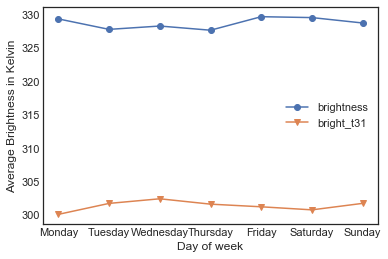

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%matplotlib inline

fig, ax = plt.subplots()
ax.set_xlabel("Day of week")
ax.set_ylabel("Average Brightness in Kelvin")
ax.plot(by_weekday.index, by_week['brightness'],label='brightness',marker='o')
ax.plot(by_weekday.index, by_week['bright_t31'],label='bright_t31',marker='v')
plt.legend()
plt.show()

In [155]:
by_daynight=df.pivot_table(
                    aggfunc=['mean'],
                    values=['brightness'],
                    index=['day_of_week','daynight'],
)
by_daynight

mean
                      brightness
day_of_week daynight            
Friday      D         333.239526
            N         318.203270
Monday      D         333.623055
            N         313.920634
Saturday    D         333.261220
            N         316.695314
Sunday      D         333.322145
            N         314.568970
Thursday    D         331.835620
            N         312.339753
Tuesday     D         331.424422
            N         312.960112
Wednesday   D         331.780219
            N         311.561911

Text(0, 0.5, 'Average Brightness in Kelvin')

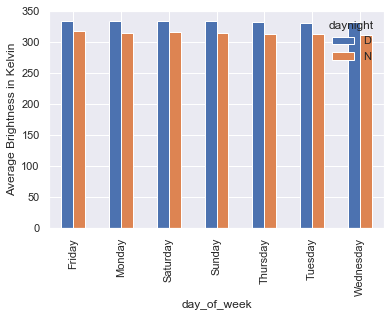

In [162]:
import seaborn as sns
sns.set()
pd.pivot_table(df, index= ['day_of_week'], aggfunc= 'mean',columns='daynight', values= "brightness").plot(kind= 'bar')
plt.ylabel("Average Brightness in Kelvin")

## Exercise 14

1. Create a new folder inside your class repo and send your instructor a link to this set of exercises.